# DNC Day 1 - Previsão de churn

## Importando os pacotes

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Lendo os dados

In [26]:
train_df = pd.read_csv('treino.csv', index_col = 0)
test_df = pd.read_csv('teste.csv', index_col = 0)

## Exploração dos dados

#### Dicionario de variaveis
- CustomerId : Identificador do cliente
- Surname : Sobrenome do cliente
- CreditScore: Score de credito do cliente
- Geography: País de origem
- Gender: Sexo
- Age : Idade
- Tenure : Tenencia
- Balance : Saldo
- NumOfProducts : Numero de produtos que possui
- IsActiveMember: É um cliente ativo (muita movimentação)  
- EstimatedSalary: Salário estimado
- Exited: Target do modelo!!

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9255 to 7271
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       8000 non-null   int64  
 1   Surname          8000 non-null   object 
 2   CreditScore      8000 non-null   int64  
 3   Geography        8000 non-null   object 
 4   Gender           8000 non-null   object 
 5   Age              8000 non-null   int64  
 6   Tenure           8000 non-null   int64  
 7   Balance          8000 non-null   float64
 8   NumOfProducts    8000 non-null   int64  
 9   HasCrCard        8000 non-null   int64  
 10  IsActiveMember   8000 non-null   int64  
 11  EstimatedSalary  8000 non-null   float64
 12  Exited           8000 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


### Sugestão de roteiro de análise: 

#### Analisar cada variáveis separadamente: 
- Qual o sexo mais frequente no conjunto de treinamento? 
- Qual a proporção entre as pessoas que saíram e ficaram (Exited 1 e 0)
- Qual a idade mais frequente no conjunto de treinamento? 
- Qual a renda media no conjunto de treimento? 
- Quantos produtos os clientes tem em média? 
- Quantos países diferentes temos clientes?
- ...

#### Analisar varíaveis com relação as outras variáveis
- Pessoas mais velhas tem remuneração média maior maior?
- Pessoas mais velhas tem maior tendencia a ter cartão de credito? 
- Existe algum país com remuneração média maior? 
- ...

#### Analisar cada variável com relação ao target: 
- Existe alguma faixa etária com maior proporção de clientes que saíram? 
- Existe algum sexo com a maior proporção de clientes que saíram? 
- Existe algum país com a maior proporçào de clientes que saíram? 
- ...

**Use sua criativiade para realizar as análises!**

## Treinando o Modelo

### Criando o set de treinamento

In [82]:
y_train = train_df['Exited']
X_train = train_df.drop(['CustomerId', 'Surname', 'Exited'], axis = 1)

In [83]:
X_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9255,686,France,Male,32,6,0.00,2,1,1,179093.26
1562,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1671,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6088,561,France,Female,27,9,135637.00,1,1,0,153080.40
6670,517,France,Male,56,9,142147.32,1,0,0,39488.04


### Tratando as variáveis numéricas

In [84]:
scaler = StandardScaler()

In [85]:
variaveis_scalling = ['CreditScore', 'EstimatedSalary', 'Balance']

In [86]:
#Lembrar: uso o metodo fit_transform nos dados de treinamento e transform nos dados de teste/predição! 
X_train[variaveis_scalling] = scaler.fit_transform(X_train[variaveis_scalling])

In [87]:
X_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9255,0.356500,France,Male,32,6,-1.218471,2,1,1,1.367670
1562,-0.203898,Germany,Male,42,4,0.696838,2,1,1,1.661254
1671,-0.961472,Spain,Male,24,3,0.618629,1,1,0,-0.252807
6088,-0.940717,France,Female,27,9,0.953212,1,1,0,0.915393
6670,-1.397337,France,Male,56,9,1.057449,1,0,0,-1.059600


### Tratando as variáveis categoricas

In [88]:
variaveis_categoricas = ['Geography', 'Gender']

In [89]:
label_encoder = OrdinalEncoder(cols=variaveis_categoricas)

In [90]:
#Lembrar: uso o metodo fit_transform nos dados de treinamento e transform nos dados de teste/predição! 
X_train[variaveis_categoricas] = label_encoder.fit_transform(X_train[variaveis_categoricas])

/Users/tuliosouza/opt/anaconda3/envs/postclick/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [91]:
X_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
9255,0.356500,1,1,32,6,-1.218471,2,1,1,1.367670
1562,-0.203898,2,1,42,4,0.696838,2,1,1,1.661254
1671,-0.961472,3,1,24,3,0.618629,1,1,0,-0.252807
6088,-0.940717,1,2,27,9,0.953212,1,1,0,0.915393
6670,-1.397337,1,1,56,9,1.057449,1,0,0,-1.059600


### Tratando o desbalanceamento entre as classes

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
#Lembrete só aplica over/under sampling nos dados de treinamento
sampling = RandomOverSampler()

In [94]:
X_train_sampled, y_train_sampled = sampling.fit_resample(X_train, y_train)

### Treinamento do modelo

In [156]:
model = LogisticRegression()

In [157]:
model.fit(X_train, y_train)

/Users/tuliosouza/opt/anaconda3/envs/postclick/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Sugestao de roteiro de modelagem
- Testar varios tipos de modelo: DecisionTree, RandomForest, SVM, XGboost,...
- Testar varios hiperparametros no modelo: GridSearch, RandomSearch,... 
- Aplicar AutoML: Tpot 
- Testar varios formas de categorical encoder: OneHotEncoding, CatboostEncoding, ...
- Testar varios formas de Scalling de features numericas: MinMaxScaler, AbsScaler ...
- Criar novas features a partir das atuais: Dividir idade em faixa etaria, Dividir renda em faixa
- Testar varios conjuntos de features: Excluir features menos importantes, Recursive Feature Elimination

### Links uteis

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://www.scikit-yb.org/en/latest/quickstart.html
- https://imbalanced-learn.org/stable/references/over_sampling.html
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://contrib.scikit-learn.org/category_encoders


## Avaliando o modelo

### Tratando os dados de teste

In [124]:
y_test = test_df['Exited']
X_test = test_df.drop(['CustomerId', 'Surname', 'Exited'], axis = 1)

In [125]:
X_test[variaveis_scalling] = scaler.transform(X_test[variaveis_scalling])
X_test[variaveis_categoricas] = label_encoder.transform(X_test[variaveis_categoricas])

### Realizando a predição

In [158]:
y_pred = model.predict(X_test)

### Calculando as metricas

In [159]:
confusion_matrix(y_pred= y_pred, y_true = y_test)

array([[1559,   48],
       [ 321,   72]])

In [160]:
print(classification_report(y_pred= y_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



### Explorando a importancia das features na predição

In [154]:
from yellowbrick.model_selection import FeatureImportances

/Users/tuliosouza/opt/anaconda3/envs/postclick/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/tuliosouza/opt/anaconda3/envs/postclick/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:190: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


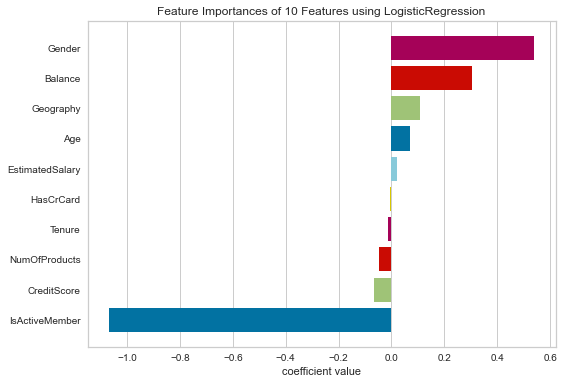

<AxesSubplot:title={'center':'Feature Importances of 10 Features using LogisticRegression'}, xlabel='coefficient value'>

In [163]:
viz = FeatureImportances(model, relative=False)

# Fit and show the feature importances
viz.fit(X_test, y_test)
viz.show()

## Exportando o modelo

In [180]:
modelo = {
'model': model,
'scaler': scaler, 
'variaveis_scalling' : variaveis_scalling,
'encoder': label_encoder, 
'variaveis_categoricas': variaveis_categoricas,
'features_modelo': list(X_train.columns)
}

In [181]:
modelo

{'model': LogisticRegression(),
 'scaler': StandardScaler(),
 'variaveis_scalling': ['CreditScore', 'EstimatedSalary', 'Balance'],
 'encoder': OrdinalEncoder(cols=['Geography', 'Gender'],
                mapping=[{'col': 'Geography', 'data_type': dtype('O'),
                          'mapping': France     1
 Germany    2
 Spain      3
 NaN       -2
 dtype: int64},
                         {'col': 'Gender', 'data_type': dtype('O'),
                          'mapping': Male      1
 Female    2
 NaN      -2
 dtype: int64}]),
 'variaveis_categoricas': ['Geography', 'Gender'],
 'features_modelo': ['CreditScore',
  'Geography',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary']}

In [182]:
import joblib

In [195]:
joblib.dump(modelo, 'modelo.pickle')

['modelo.pickle']

In [196]:
modelo = joblib.load('modelo.pickle')

In [197]:
def predict(modelo, dataframe):
    dataframe[modelo['variaveis_scalling']] = modelo['scaler'].transform(dataframe[modelo['variaveis_scalling']])
    dataframe[modelo['variaveis_categoricas']] = modelo['encoder'].transform(dataframe[modelo['variaveis_categoricas']])
    dataframe['predicao'] = modelo['model'].predict(dataframe[modelo['features_modelo']])
    return dataframe

In [198]:
predict(modelo, test_df)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicao
RowNumber,,,,,,,,,,,,,,
6253,15687492,Anderson,-6.83354,-1.0,-1.0,32,3,-1.21849,2,0,0,-1.746196,0,0
4685,15736963,Herring,-6.83354,-1.0,-1.0,43,1,-1.21849,2,1,1,-1.746196,0,0
1732,15721730,Amechi,-6.83354,-1.0,-1.0,44,4,-1.21849,2,1,0,-1.746196,0,0
4743,15762134,Liang,-6.83354,-1.0,-1.0,59,8,-1.21849,2,1,1,-1.746196,0,0
4522,15648898,Chuang,-6.83354,-1.0,-1.0,27,7,-1.21849,1,1,1,-1.746196,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,15598982,Klein,-6.83354,-1.0,-1.0,53,5,-1.21849,1,0,1,-1.746196,1,0
8286,15572631,Ndubuisi,-6.83354,-1.0,-1.0,25,10,-1.21849,1,0,1,-1.746196,0,0
7854,15746674,Miller,-6.83354,-1.0,-1.0,47,7,-1.21849,1,1,0,-1.746196,1,0


In [199]:
!pip freeze

absl-py==0.11.0
aiohttp==3.7.2
alabaster==0.7.12
altair==4.1.0
appdirs==1.4.3
applaunchservices==0.2.1
appnope @ file:///opt/concourse/worker/volumes/live/0291c9e1-4b15-459f-623e-2770f55be269/volume/appnope_1594338395037/work
argh==0.26.2
argon2-cffi @ file:///opt/concourse/worker/volumes/live/59af29ac-4890-416e-7ab7-794f8d6f7ecd/volume/argon2-cffi_1596828548321/work
astor==0.8.1
astroid @ file:///opt/concourse/worker/volumes/live/21fd14a9-2a7e-484b-7394-5a9912cdcf80/volume/astroid_1592498459180/work
astunparse==1.6.3
async-generator==1.10
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1598374659300/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
Babel==2.8.0
backcall==0.2.0
base58==2.0.1
beautifulsoup4==4.9.3
bleach==3.1.5
blinker==1.4
blis==0.4.1
boto==2.49.0
boto3==1.14.62
botocore==1.17.62
brotlipy==0.7.0
bs4==0.0.1
cachetools==4.1.1
catalogue==1.0.0
catboost==0.24.1
category-encoders==2.2.2
certifi==2020.6.20
cffi @ file://

In [ ]:
pandas
seaborn
category-encoders
streamlit
scikit-learn
imbalanced-learn
tpot
jupyter
